In [7]:
import pandas as pd

In [10]:
# Load dataset
df = pd.read_excel(r"C:\Users\HP\Downloads\updated_research_nutrition_data_reversed.xlsx", engine="openpyxl")

In [15]:
df.head()

,Age,Sex,Marital Status,Educational Level,Residence,Religion,BMI,WHO Stage,Duration on ART in Months,TB screening Result,FunctionalStatus,Baseline CD4 Count,Adherance,Regimen Line,TPT Started,CPT Use,Baseline_CD4_Category,Recent_CD4_Category,viral_load_status
0,48,1,1,3,1,2,0,4,251.0,0,2,507,1,1,1,1,2,2,0
1,49,0,1,3,1,2,0,4,254.0,0,2,480,1,0,1,1,1,2,0
2,67,1,1,3,0,2,0,1,52.0,0,2,56,2,0,0,1,1,1,0
3,80,1,1,3,0,2,1,1,65.0,0,2,240,2,0,0,0,0,0,0
4,53,1,1,3,0,2,0,1,88.0,0,2,240,2,0,0,0,0,0,0


In [11]:
#Bar Graph of Class Counts Before and After SMOTE

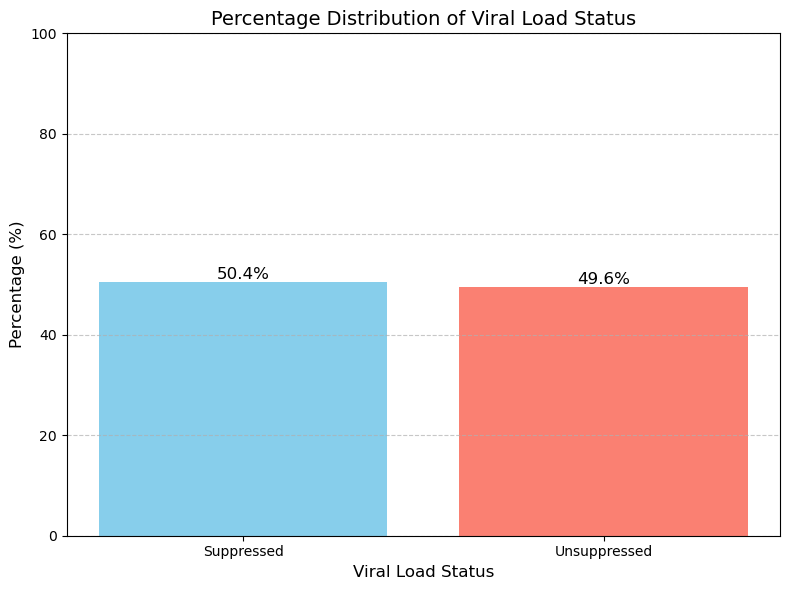

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel(r"C:\Users\HP\Downloads\updated_research_nutrition_data_reversed.xlsx", engine="openpyxl")

# Calculate percentage distribution of viral_load_status
status_counts = df['viral_load_status'].value_counts(normalize=True) * 100

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(status_counts.index, status_counts.values, color=['skyblue', 'salmon'])

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

# Customize plot
plt.title("Percentage Distribution of Viral Load Status", fontsize=14)
plt.xlabel("Viral Load Status", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


In [13]:
#Initial Training

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN

# Load dataset
df = pd.read_excel(r"C:\Users\HP\Downloads\updated_research_nutrition_data_reversed.xlsx", engine="openpyxl")

# Encode target variable
df['viral_load_status'] = df['viral_load_status'].map({'Suppressed': 0, 'Unsuppressed': 1})
df = df.dropna(subset=['viral_load_status'])

# Drop columns that may cause feature mismatch
drop_cols = ['Baseline CD4 Count', 'Recent_CD4_Category']
df = df.drop(columns=drop_cols, errors='ignore')

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Split features and target
X = df.drop(columns=['viral_load_status'])
y = df['viral_load_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
results = []
roc_data = {}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 2),
        "Precision": round(prec, 2),
        "Recall": round(rec, 2),
        "F1 Score": round(f1, 2),
        "ROC AUC": round(auc, 2)
    })

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_data[f"{name} (AUC={auc:.2f})"] = (fpr, tpr)

# Display evaluation metrics table
results_df = pd.DataFrame(results)
print("Evaluation Metrics for All Models:")
print(results_df)





Evaluation Metrics for All Models:
                 Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0  Logistic Regression      0.62       0.60    0.55      0.58     0.66
1        Random Forest      0.72       0.70    0.70      0.70     0.79
2    Gradient Boosting      0.73       0.70    0.70      0.70     0.79
3          Naive Bayes      0.66       0.59    0.84      0.69     0.73
4                  SVM      0.54       0.51    0.55      0.53     0.57
5                  KNN      0.54       0.50    0.58      0.54     0.56
6        Decision Tree      0.67       0.65    0.62      0.64     0.67
7              XGBoost      0.69       0.66    0.67      0.66     0.76


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [14:52:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


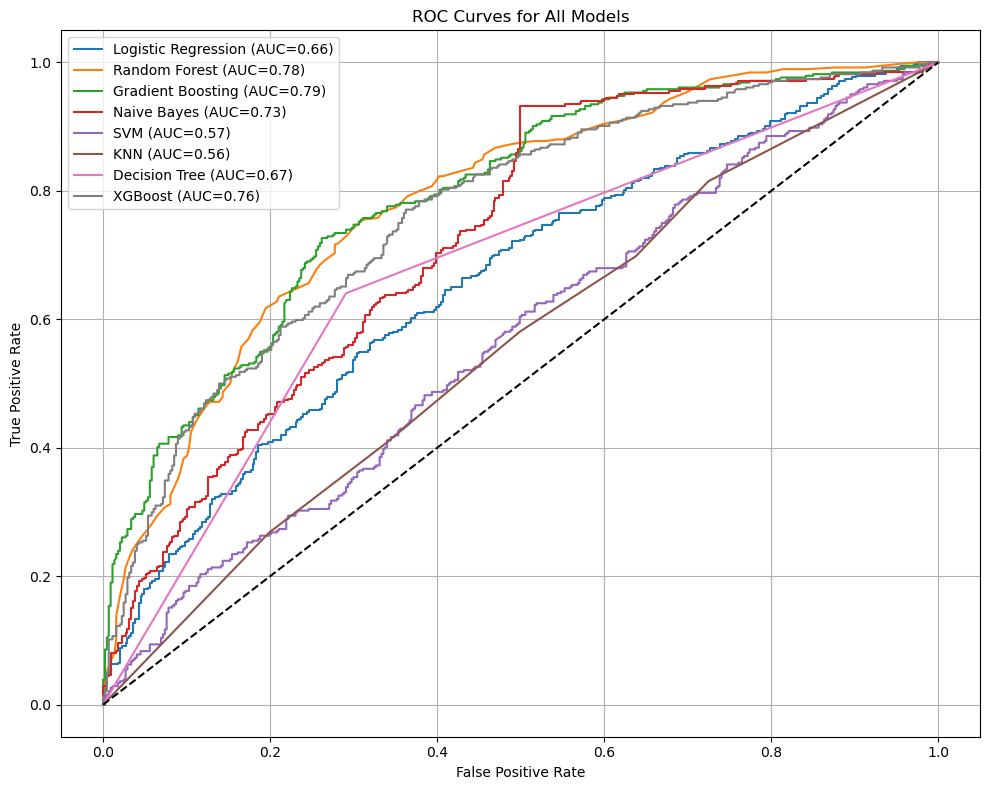

In [6]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for label, (fpr, tpr) in roc_data.items():
    plt.plot(fpr, tpr, label=label)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

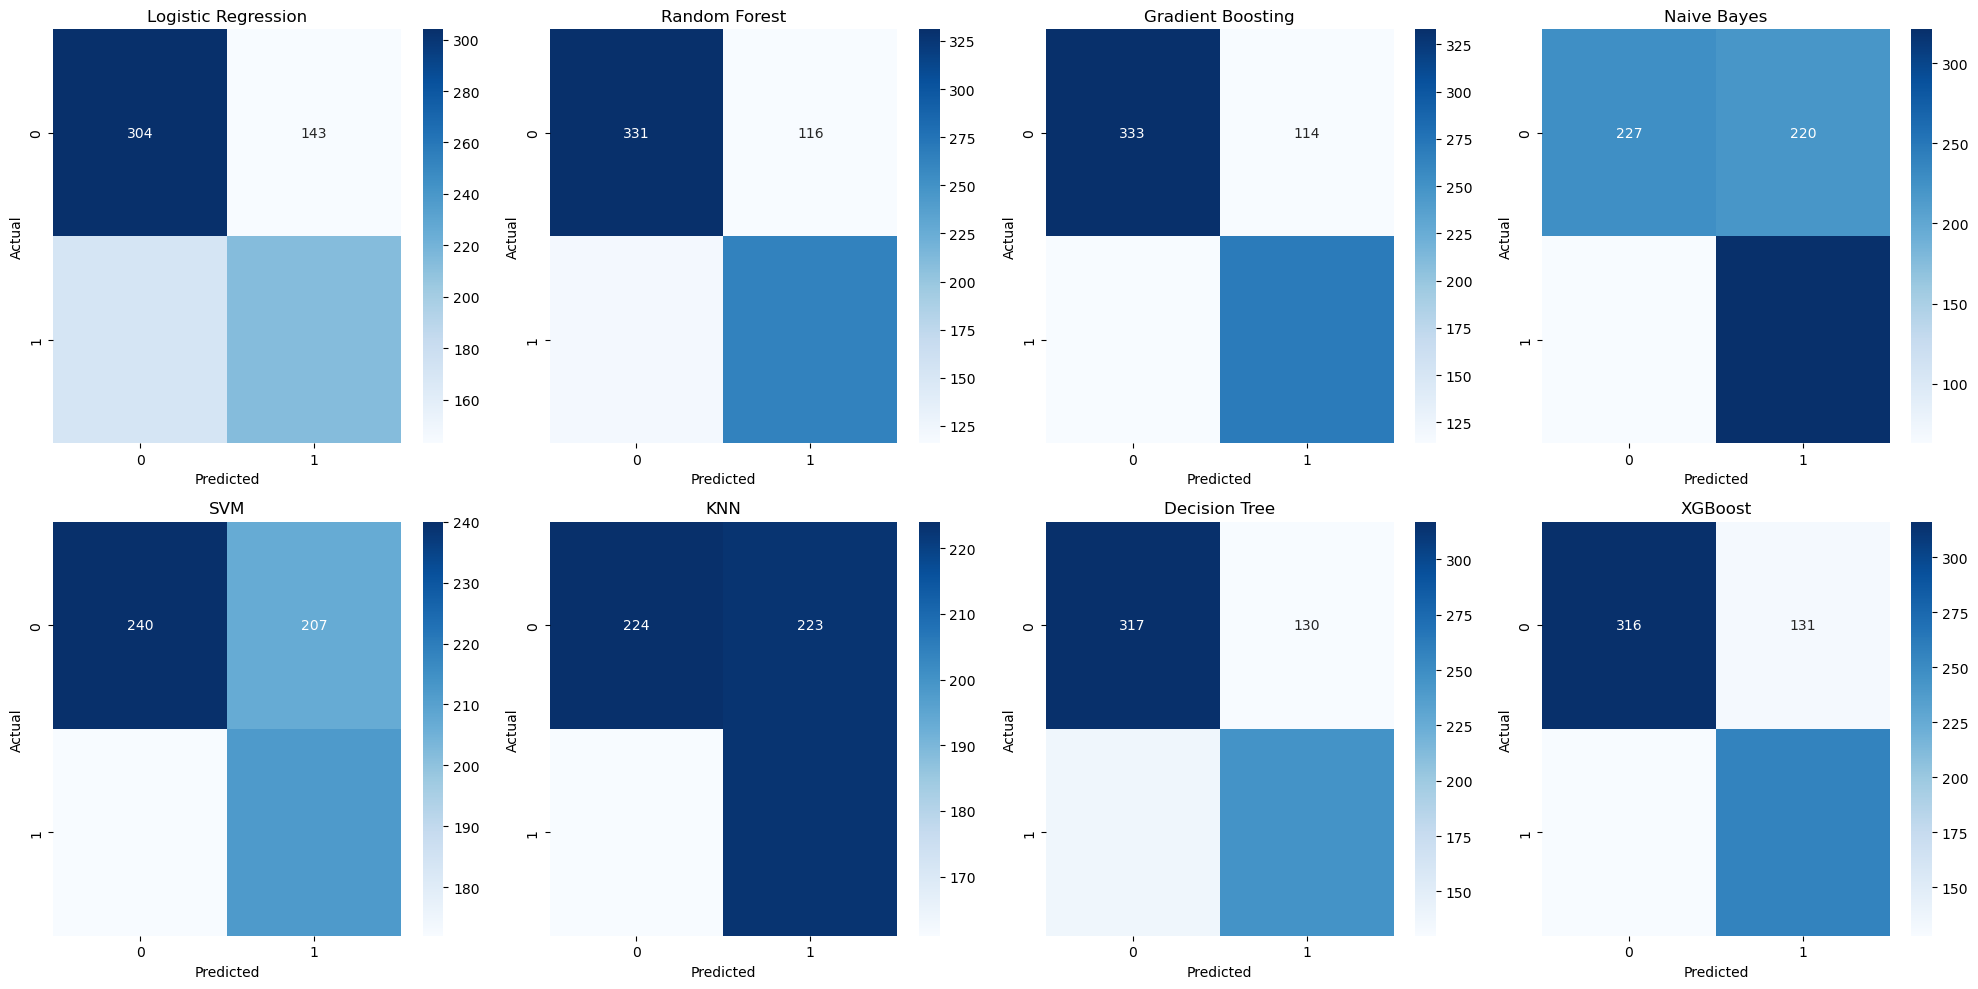

In [3]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()



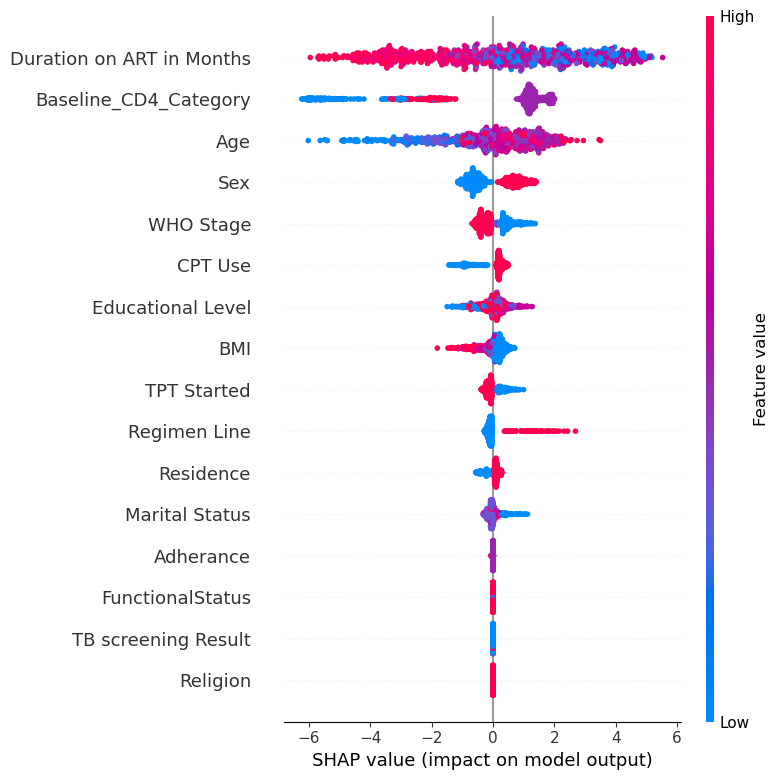

In [5]:
# SHAP analysis for XGBoost
explainer = shap.Explainer(models["XGBoost"], X_test)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)




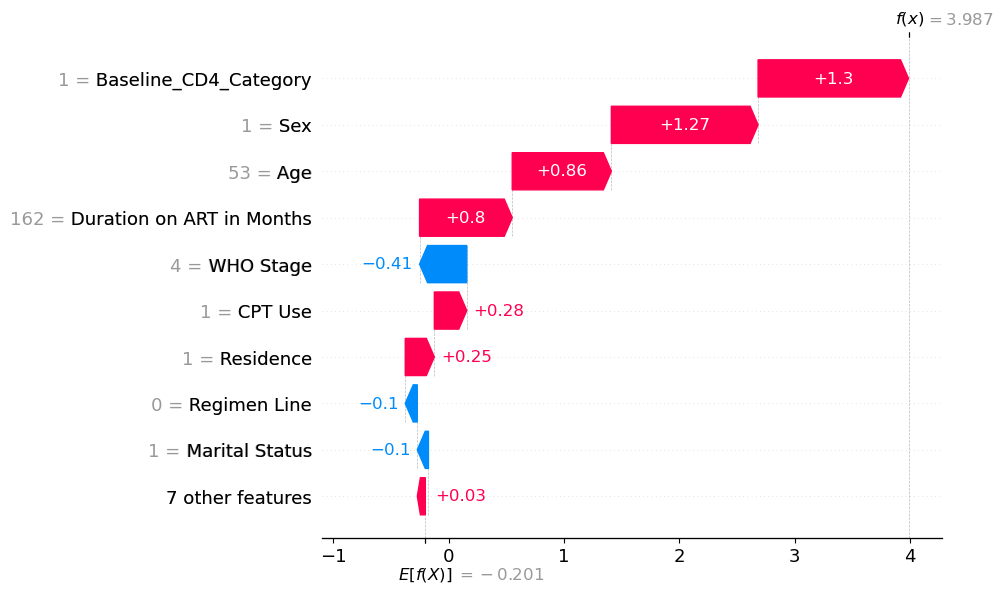

In [7]:
# SHAP waterfall plot for one sample
shap.plots.waterfall(shap_values[0])

Evaluation Metrics for Tuned Gradient Boosting:
Accuracy:  0.76
Precision: 0.73
Recall:    0.75
F1 Score:  0.74


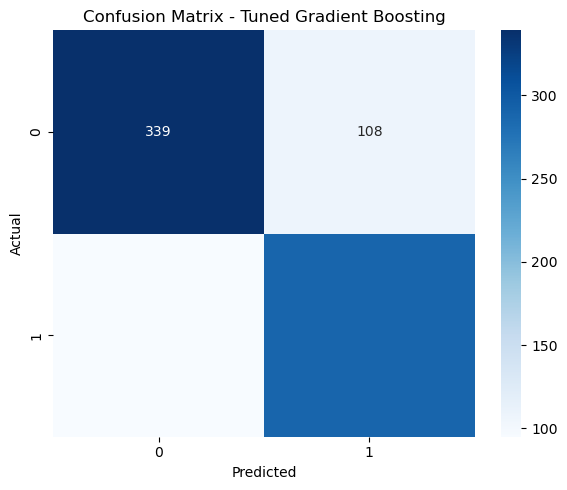

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_excel(r"C:\Users\HP\Downloads\updated_research_nutrition_data_reversed.xlsx", engine="openpyxl")

# Encode target variable
df['viral_load_status'] = df['viral_load_status'].map({'Suppressed': 0, 'Unsuppressed': 1})
df = df.dropna(subset=['viral_load_status'])

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Split features and target
X = df.drop(columns=['viral_load_status'])
y = df['viral_load_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define Gradient Boosting and parameter grid
gb = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_gb = grid_search.best_estimator_

# Predictions
y_pred = best_gb.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Evaluation Metrics for Tuned Gradient Boosting:")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


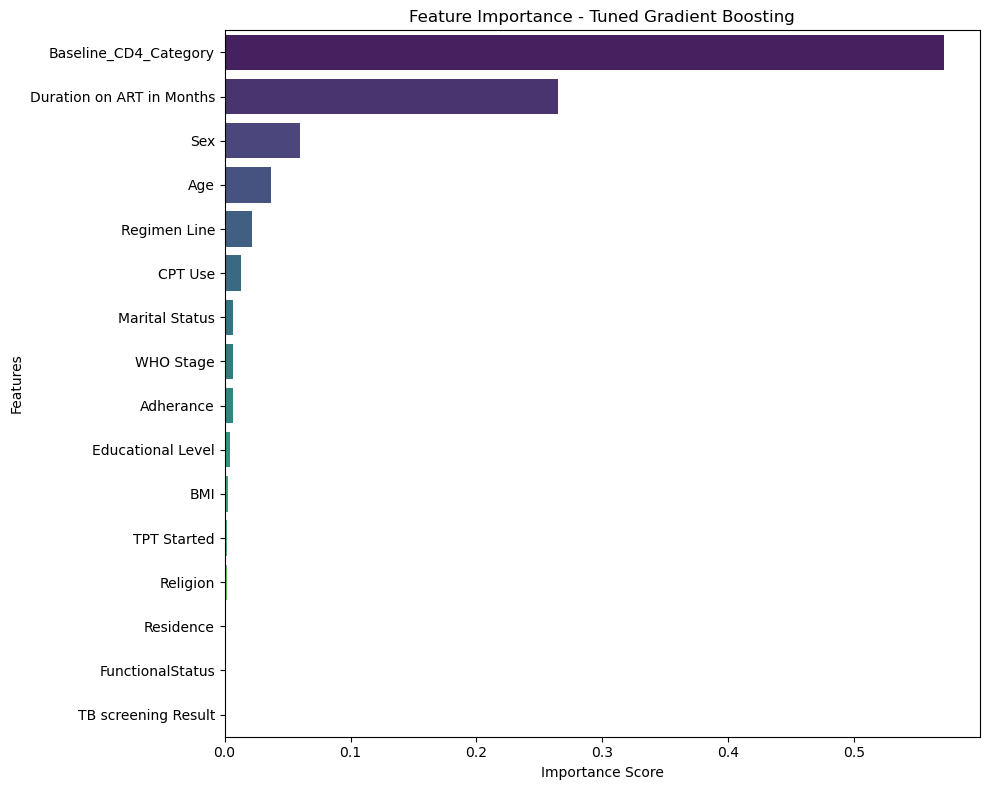

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_excel(r"C:\Users\HP\Downloads\updated_research_nutrition_data_reversed.xlsx", engine="openpyxl")

# Encode target variable
df['viral_load_status'] = df['viral_load_status'].map({'Suppressed': 0, 'Unsuppressed': 1})
df = df.dropna(subset=['viral_load_status'])

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Split features and target
X = df.drop(columns=['viral_load_status'])
y = df['viral_load_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define Gradient Boosting and parameter grid
gb = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_gb = grid_search.best_estimator_

# Feature importance
importances = best_gb.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance - Tuned Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
